#### Text Features
Embedding used: Fasttext (4 feature size)
Applied Power Transform With Outlier detection


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
train = pd.read_csv("Train12P.csv")

test = pd.read_csv("Test12P.csv")


In [17]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap

num_features = 4

feature_map = ZZFeatureMap(num_features)
feature_map.decompose().draw(output="mpl", style="clifford", fold=1)

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=4, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=150)

from qiskit.primitives import Sampler

sampler = Sampler()

In [3]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


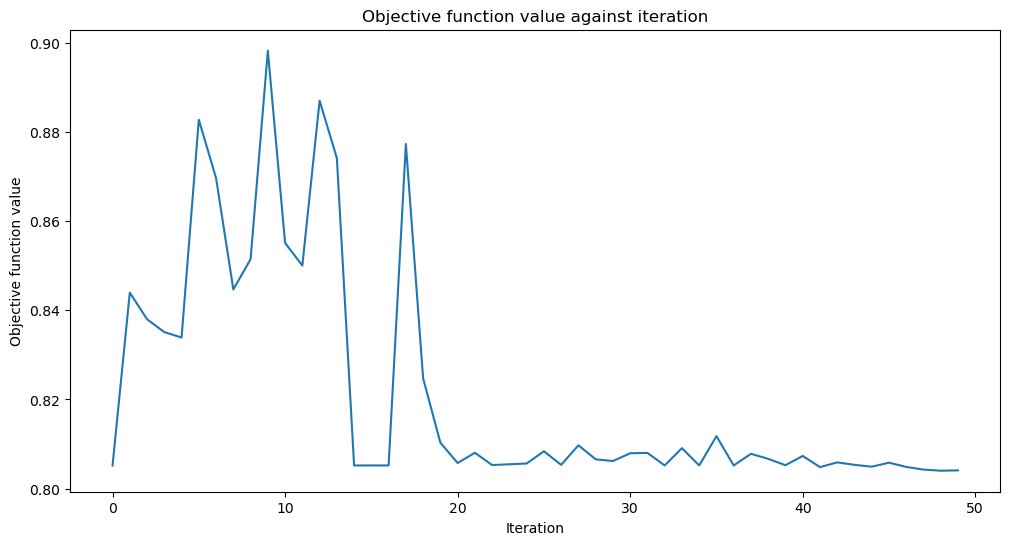

Training time: 119 seconds


In [25]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
'''
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)
'''

vqc.warm_start = True
vqc.optimizer = COBYLA(maxiter=50)
# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(np.array(train[['Text1','Text2','Text3','Text4']]), np.array(train['y']))
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [37]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC.load('text_model2.model')

In [38]:
#150 iterations ZZ 4 features
print(vqc.score(np.array(train[['Text1','Text2','Text3','Text4']]), np.array(train['y'])))
print(vqc.score(np.array(test[['Text1','Text2','Text3','Text4']]), np.array(test['y'])))

0.742619926199262
0.7032967032967034


In [39]:
pred = vqc.predict(np.array(test[['Text1','Text2','Text3','Text4']]))

In [41]:
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support(test['y'], pred, average='weighted')

/home/admin-pc/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.49462625286801115, 0.7032967032967034, 0.5807869549805034, None)

In [27]:
from qiskit import qpy
with open('circuit_new_text8gpt.qpy', 'rb') as handle:
    qc = qpy.load(handle)


In [28]:
import pandas as pd
train_g = pd.read_csv("TextGPT8Train.csv")
test_g = pd.read_csv("TextGPT8Test.csv")

In [29]:
from qiskit_machine_learning.algorithms.classifiers import VQC
gpt_cl = VQC.load("TextGPT8.model")

In [30]:
print(gpt_cl.score(np.array(train_g.drop('y',axis=1)), np.array(train_g['y'])))
print(gpt_cl.score(np.array(test_g.drop('y',axis=1)), np.array(test_g['y'])))

0.6838235294117647
0.7296416938110749


In [31]:
pred = gpt_cl.predict(np.array(test_g.drop('y',axis=1)))
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support(test_g['y'], pred, average='micro')

(0.7296416938110749, 0.7296416938110749, 0.729641693811075, None)

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test_g['y']), pred),"Recall",recall_score(np.array(test_g['y']), pred),"F1:",f1_score(np.array(test_g['y']), pred))

Precision: 0.7467532467532467 Recall 0.7232704402515723 F1: 0.7348242811501596


#### Image Features
Vision Transformer (ViT) Embeddings - Size 8 

Applied UMAP for transformation

In [42]:
classf = VQC.load("image_model2.model")

In [43]:
train_i = pd.read_csv("ImageViTTrain8.csv")
test_i = pd.read_csv("ImageViTest8.csv")

In [44]:
#300 iterations 8 features
print(classf.score(np.array(train_i.drop('y',axis=1)), np.array(train_i['y'])))
print(classf.score(np.array(test_i.drop('y',axis=1)), np.array(test_i['y'])))

0.7508169934640523
0.7133550488599348


In [45]:
pred = classf.predict(np.array(test_i.drop('y',axis=1)))
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support(test_i['y'], pred, average='micro')

(0.7133550488599348, 0.7133550488599348, 0.7133550488599348, None)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test_i['y']), pred),"Recall",recall_score(np.array(test_i['y']), pred),"F1:",f1_score(np.array(test_i['y']), pred))

Precision: 0.6961325966850829 Recall 0.7924528301886793 F1: 0.7411764705882353


#### Audio Features
Wav2Vec Embeddings - Size 8
Applied UMAP for transformation

In [86]:
train_a = pd.read_csv("AudioW2VTrain.csv")
test_a = pd.read_csv("AudioW2VTest.csv")

In [87]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
aud_classf = VQC.load('audio_w2v.model')

In [88]:
#300 iterations 8 features
print(aud_classf.score(np.array(train_a.drop(['y','Label'],axis=1)), np.array(train_a['y'])))
print(aud_classf.score(np.array(test_a.drop(['y','Label'],axis=1)), np.array(test_a['y'])))

0.7165032679738562
0.6872964169381107


In [89]:
pred = aud_classf.predict(np.array(test_a.drop(['y','Label'],axis=1)))
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support(test_a['y'], pred, average='micro')

(0.6872964169381107, 0.6872964169381107, 0.6872964169381107, None)

In [90]:
print("Precision:",precision_score(np.array(converted_video_names_test_changed), pred),"Recall",recall_score(np.array(converted_video_names_test_changed), pred),"F1:",f1_score(np.array(converted_video_names_test_changed), pred))

Precision: 0.7032258064516129 Recall 0.6855345911949685 F1: 0.6942675159235668


In [ ]:
train = pd.read_csv("AudioW2VTrain40.csv")
test = pd.read_csv("AudioW2VTest40.csv")

In [ ]:
from umap import UMAP
umap_fit = UMAP(n_components=4,n_neighbors=8,random_state=0)
tr = umap_fit.fit_transform(train.drop(['y','Unnamed: 0','Label'],axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
te = umap_fit.transform(test.drop(['y','Unnamed: 0','Label'],axis=1))

In [ ]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC.load('Wav2Vec4.model')

In [ ]:
print(vqc.score(np.array(tr), np.array(train['y'])))
print(vqc.score(np.array(te), np.array(test['y'])))

0.5187908496732027
0.504885993485342


In [ ]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score
precision_recall_fscore_support( np.array(test['y']), pred,average='micro')

(0.504885993485342, 0.504885993485342, 0.504885993485342, None)

In [ ]:
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.49375 Recall 0.5266666666666666 F1: 0.5096774193548387


In [74]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
import json

algorithm_globals.random_seed = 123
import pickle
FOLDER_NAME = './'
with open(FOLDER_NAME+'combined_files_s_a_r.json', 'rb') as fp:
    allDataAnnotation = json.load(fp)


print(allDataAnnotation.keys())
alist , alabel = allDataAnnotation.keys(), allDataAnnotation.values()
# In[4]:


allVidList = []
allVidLab = []
allVidList.extend(alist)

allVidLab.extend(alabel)
#converted_video_names = convert_video_names(allVidList)

allAudioFeatures = {}
failedList = []
train_features, test_features, train_labels, test_labels = train_test_split(
    allVidLab,allVidList, train_size=0.8, random_state=algorithm_globals.random_seed
)
def get_mfcc_from_dict(video_names, mfcc_dict):
    mfcc_list = []
    for name in video_names:
        if name in mfcc_dict:
            mfcc_list.append(mfcc_dict[name])
        else:
            print(f"Warning: No MFCC found for {name}")
            mfcc_list.append(None)  # or handle missing data as needed
    return mfcc_list

# Function to load pickled MFCC files
def load_pickled_mfcc(filepath1, filepath2, filepath3):
    with open(filepath1, 'rb') as f:
        mfcc_features = pickle.load(f)
    with open(filepath2, 'rb') as f:
        mfcc_features.update(pickle.load(f))
    with open(filepath3, 'rb') as f:
        mfcc_features.update(pickle.load(f))
    return mfcc_features

dict_keys(['R_hate_video_005', 'R_hate_video_089', 'R_hate_video_044', 'R_hate_video_020', 'R_hate_video_140', 'R_hate_video_166', 'R_hate_video_124', 'R_hate_video_208', 'R_hate_video_071', 'R_hate_video_197', 'R_hate_video_054', 'R_hate_video_135', 'R_hate_video_074', 'R_hate_video_117', 'R_hate_video_036', 'R_hate_video_156', 'R_hate_video_142', 'R_hate_video_110', 'R_hate_video_040', 'R_hate_video_138', 'R_hate_video_046', 'R_hate_video_123', 'R_hate_video_251', 'R_hate_video_187', 'R_hate_video_211', 'R_hate_video_105', 'R_hate_video_019', 'R_hate_video_106', 'R_hate_video_154', 'R_hate_video_113', 'R_hate_video_121', 'R_hate_video_018', 'R_hate_video_179', 'R_hate_video_155', 'R_hate_video_116', 'R_hate_video_153', 'R_hate_video_134', 'R_hate_video_088', 'R_hate_video_069', 'R_hate_video_175', 'R_hate_video_258', 'R_hate_video_192', 'R_hate_video_059', 'R_hate_video_206', 'R_hate_video_015', 'R_hate_video_082', 'R_hate_video_222', 'R_hate_video_024', 'R_hate_video_228', 'R_hate_v

In [75]:
def convert_video_names(names):
    converted_names = []
    for name in names:
        if name.find("non_hate") == -1:
            #print(name)
        #if name.startswith('non_hate_video'):
            converted_names.append(1)
        else:
            converted_names.append(0)
    return converted_names

In [76]:
converted_video_names_test = convert_video_names(test_labels)
converted_video_names_train = convert_video_names(train_labels)
converted_video_names_train_changed = np.where(np.array(converted_video_names_train)== 0, -1, converted_video_names_train)
converted_video_names_test_changed = np.where(np.array(converted_video_names_test)== 0, -1, converted_video_names_test)

In [85]:
from umap import UMAP
umap_fit = UMAP(n_components=8,n_neighbors=16,random_state=0)
tr = umap_fit.fit_transform(mfcc_train)
te = umap_fit.transform(mfcc_test)

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC.load('MFCC8.model')

In [ ]:
print(vqc.score(np.array(tr), np.array(converted_video_names_train_changed)))
print(vqc.score(np.array(te), np.array(converted_video_names_test_changed)))

0.5441176470588235
0.5407166123778502


In [ ]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score
precision_recall_fscore_support( np.array(converted_video_names_test_changed), pred,average='micro')

(0.5407166123778502, 0.5407166123778502, 0.5407166123778502, None)

In [ ]:
print("Precision:",precision_score(np.array(converted_video_names_test_changed), pred),"Recall",recall_score(np.array(converted_video_names_test_changed), pred),"F1:",f1_score(np.array(converted_video_names_test_changed), pred))

Precision: 0.5266272189349113 Recall 0.5933333333333334 F1: 0.5579937304075235


#### All modalitiles (GPT 2 + Wav2Vec + ViT ) 12 features
UMAP Transformation was applied

In [1]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
cla = NeuralNetworkClassifier.load('allmodel.model')

In [2]:
import pandas as pd
train= pd.read_csv("AllTrain.csv")
test = pd.read_csv("AllTest.csv")

In [3]:
from umap import UMAP
umap_fit = UMAP(n_components=12,n_neighbors=24,random_state=0)

2024-08-09 22:10:04.937996: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 22:10:04.945191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 22:10:04.953399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 22:10:04.955859: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 22:10:04.962261: I tensorflow/core/platform/cpu_feature_guar

In [4]:
tr = umap_fit.fit_transform(train.drop(['Labels','y'],axis=1))
te = umap_fit.transform(test.drop(['Labels','y'],axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(tr,train['y'])

RandomForestClassifier()

In [50]:
pred = rf.predict(te)

In [ ]:
#12 features
from sklearn.metrics import classification_report
print(classification_report(test['y'],pred))

              precision    recall  f1-score   support

          -1       0.66      0.70      0.68       148
           1       0.70      0.66      0.68       159

    accuracy                           0.68       307
   macro avg       0.68      0.68      0.68       307
weighted avg       0.68      0.68      0.68       307



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test['y'],pred))

0.6775244299674267


In [ ]:
from sklearn.metrics import f1_score
f1_score(test['y'],pred)

0.6796116504854369

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv1D(12, 3, activation='relu', input_shape=(12,1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
#model.add(layers.Conv1D(8, 3, activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 14, 12)            48        
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 7, 12)             0         
 ng1D)                                                           
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 8)              296       
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 2, 8)              0         
 ng1D)                                                           
                                                                 
 dense_8 (Dense)             (None, 2, 4)              36        
                                                                 
 dense_9 (Dense)             (None, 2, 2)             

In [ ]:
import numpy as np
import tensorflow.keras.backend as K
from scipy.optimize import brentq
from scipy.interpolate import interp1d


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fp(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)

def fn(y_true, y_pred):
    return K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

def tp(y_true, y_pred):
    return K.sum(K.cast(y_true*y_pred, 'float'), axis=0)

def tn(y_true, y_pred):
    return K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)

def f1(y_true, y_pred):
    p = tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred) + K.epsilon())
    r = tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred) + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    return K.mean(f1)

def eer(y_true, y_pred):
    fpr = fp(y_true, y_pred)
    tpr = tp(y_true, y_pred)
    threshold = 0.5
    eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    return eer

In [ ]:
input_data = tr.reshape(( -1, 12,1))

In [ ]:
test_data = te.reshape(( -1, 12,1))

In [ ]:
tr_y = train['y'].replace(-1, 0)
te_y = test['y'].replace(-1, 0)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',tp,fn,fp,tn ])

history = model.fit(input_data, tr_y, epochs=50, 
                    validation_data=(test_data, te_y))

Epoch 1/50
39/39 [==============================] - 1s 9ms/step - loss: 0.5321 - accuracy: 0.7516 - tp: 13.9996 - fn: 2.4449 - fp: 13.1504 - tn: 2.2483 - val_loss: 0.5964 - val_accuracy: 0.7003 - val_tp: 13.8936 - val_fn: 2.2986 - val_fp: 12.8679 - val_tn: 2.1354
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7582 - tp: 14.1331 - fn: 2.3114 - fp: 13.2527 - tn: 2.1459 - val_loss: 0.6009 - val_accuracy: 0.7068 - val_tp: 14.1604 - val_fn: 2.0318 - val_fp: 13.1114 - val_tn: 1.8919
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7565 - tp: 14.2357 - fn: 2.2479 - fp: 13.2864 - tn: 2.0730 - val_loss: 0.5980 - val_accuracy: 0.6938 - val_tp: 13.8466 - val_fn: 2.3456 - val_fp: 12.8276 - val_tn: 2.1756
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7467 - tp: 14.2415 - fn: 2.2226 - fp: 13.3194 - tn: 2.0597 - val_loss: 0.6151 - val_accuracy: 0.7036 - val_tp: 14.2

10/10 - 0s - loss: 0.5940 - accuracy: 0.6938 - 21ms/epoch - 2ms/step


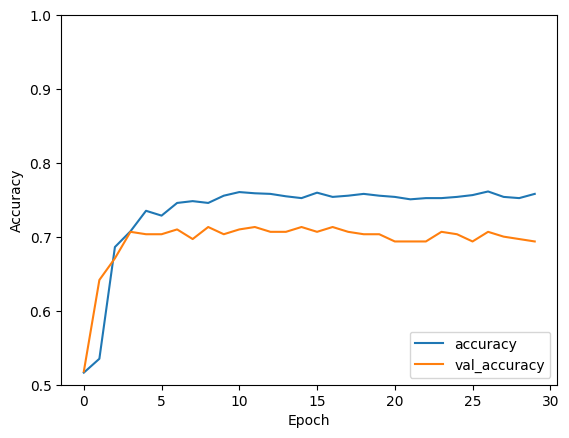

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  te_y, verbose=2)

In [5]:
cla = NeuralNetworkClassifier.load('allmodel.model')

In [53]:
print(cla.score(tr, np.array(train['y'])))
print(cla.score(te, np.array(test['y'])))

0.7540849673202614
0.7068403908794788


In [11]:
pred = cla.predict(te)
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score
precision_recall_fscore_support( np.array(test['y']), pred,average='micro')

(0.7068403908794788, 0.7068403908794788, 0.7068403908794788, None)

In [15]:
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7412587412587412 Recall 0.6666666666666666 F1: 0.7019867549668874


In [57]:
print(classification_report(test['y'],pred))

              precision    recall  f1-score   support

          -1       0.68      0.75      0.71       148
           1       0.74      0.67      0.70       159

    accuracy                           0.71       307
   macro avg       0.71      0.71      0.71       307
weighted avg       0.71      0.71      0.71       307



In [ ]:
vv = VQC.load('All12VQC.model')

In [ ]:
print(vv.score(np.array(tr), np.array(train['y'])))
print(vv.score(np.array(te), np.array(test['y'])))

0.7001633986928104
0.6384364820846905


In [ ]:
pred = vv.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.75 Recall 0.4528301886792453 F1: 0.5647058823529413


In [74]:
import pandas as pd
train = pd.read_csv("train_sar.csv")
test = pd.read_csv("test_sar.csv")

In [51]:
import time
import numpy as np
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC.load('ImageInception4.model')

In [52]:
print(vqc.score(train[['Image1','Image2','Image3','Image4']], np.array(train['y'])))
print(vqc.score(test[['Image1','Image2','Image3','Image4']], np.array(test['y'])))

0.4907749077490775
0.45054945054945056


In [53]:
pred = vqc.predict(test[['Image1','Image2','Image3','Image4']])
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support( np.array(test['y']), pred,average='micro')

(0.45054945054945056, 0.45054945054945056, 0.45054945054945056, None)

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.3230769230769231 Recall 0.7777777777777778 F1: 0.45652173913043476


In [55]:
import pandas as pd
tr = pd.read_csv("Inception8_train.csv")
te = pd.read_csv("Inception8_test.csv")

In [56]:
vqc = VQC.load('Inception8.model')
print(vqc.score(tr.drop('y',axis=1), np.array(tr['y'])))
print(vqc.score(te.drop('y',axis=1), np.array(te['y'])))

0.6053921568627451
0.5537459283387622


In [58]:
pred = vqc.predict(te.drop('y',axis=1))
from sklearn.metrics import precision_score, recall_score
precision_recall_fscore_support(np.array(te['y']), pred,average='micro')

(0.5537459283387622, 0.5537459283387622, 0.5537459283387622, None)

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(te['y']), pred),"Recall",recall_score(np.array(te['y']), pred),"F1:",f1_score(np.array(te['y']), pred))

Precision: 0.56875 Recall 0.5723270440251572 F1: 0.5705329153605015


In [47]:
import pandas as pd
tr = pd.read_csv("ViTTrain4.csv")
te = pd.read_csv("ViTTest4.csv")

In [48]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('ViT4.model')
print(vqc.score(tr.drop('y',axis=1), np.array(tr['y'])))
print(vqc.score(te.drop('y',axis=1), np.array(te['y'])))

0.6429738562091504
0.5765472312703583


In [49]:
pred = vqc.predict(te.drop('y',axis=1))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(te['y']), pred,average='micro')

(0.5765472312703583, 0.5765472312703583, 0.5765472312703583, None)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(te['y']), pred),"Recall",recall_score(np.array(te['y']), pred),"F1:",f1_score(np.array(te['y']), pred))

Precision: 0.5935483870967742 Recall 0.5786163522012578 F1: 0.5859872611464967


In [62]:
import pandas as pd
train = pd.read_csv("GPT_Train.csv")
test = pd.read_csv("GPT_Test.csv")

In [63]:
from umap import UMAP
umap_fit = UMAP(n_components=4,n_neighbors=8,random_state=0)

In [64]:
tr = umap_fit.fit_transform(train.drop('y',axis=1))
te = umap_fit.transform(test.drop('y',axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [70]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('TextGPT4.model')
print(vqc.score(tr, np.array(train['y'])))
print(vqc.score(te, np.array(test['y'])))

0.5506535947712419
0.5309446254071661


In [68]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.5309446254071661, 0.5309446254071661, 0.5309446254071661, None)

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.5428571428571428 Recall 0.5974842767295597 F1: 0.5688622754491017


Hateexplain - BERT

In [32]:
import pandas as pd
train = pd.read_csv("TrainHateBERT.csv")
test = pd.read_csv("TestHateBERT.csv")

In [33]:
from umap import UMAP
umap_fit = UMAP(n_components=4,n_neighbors=8,random_state=0)
tr = umap_fit.fit_transform(train.drop('y',axis=1))
te = umap_fit.transform(test.drop('y',axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [38]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('HateBERTText4.model')
print(vqc.score(tr, np.array(train['y'])))
print(vqc.score(te, np.array(test['y'])))

0.6748366013071896
0.7133550488599348


In [36]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.7133550488599348, 0.7133550488599348, 0.7133550488599348, None)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7384615384615385 Recall 0.64 F1: 0.6857142857142857


In [39]:
import pandas as pd
train = pd.read_csv("TrainBERT.csv")
test = pd.read_csv("TestBERT.csv")

In [43]:
from umap import UMAP
umap_fit = UMAP(n_components=4,n_neighbors=8,random_state=0)
tr = umap_fit.fit_transform(train.drop('y',axis=1))
te = umap_fit.transform(test.drop('y',axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [44]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('BERTText4.model')
print(vqc.score(tr, np.array(train['y'])))
print(vqc.score(te, np.array(test['y'])))

0.5400326797385621
0.5309446254071661


In [45]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.5309446254071661, 0.5309446254071661, 0.5309446254071661, None)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.5138888888888888 Recall 0.74 F1: 0.6065573770491802


In [47]:
from umap import UMAP
umap_fit = UMAP(n_components=8,n_neighbors=16,random_state=0)
tr = umap_fit.fit_transform(train.drop('y',axis=1))
te = umap_fit.transform(test.drop('y',axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [48]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('BERTText8.model')
print(vqc.score(tr, np.array(train['y'])))
print(vqc.score(te, np.array(test['y'])))

0.5629084967320261
0.5504885993485342


In [49]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.5504885993485342, 0.5504885993485342, 0.5504885993485342, None)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.529126213592233 Recall 0.7266666666666667 F1: 0.6123595505617978


In [51]:
import pandas as pd
train = pd.read_csv("TrainHateBERT.csv")
test = pd.read_csv("TestHateBERT.csv")
from umap import UMAP
umap_fit = UMAP(n_components=8,n_neighbors=16,random_state=0)
tr = umap_fit.fit_transform(train.drop('y',axis=1))
te = umap_fit.transform(test.drop('y',axis=1))

/home/admin-pc/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [53]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('HateBERTText8.model')
print(vqc.score(tr, np.array(train['y'])))
print(vqc.score(te, np.array(test['y'])))

0.6282679738562091
0.5504885993485342


In [54]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.5504885993485342, 0.5504885993485342, 0.5504885993485342, None)

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.5344827586206896 Recall 0.62 F1: 0.574074074074074


In [96]:
import pandas as pd
train = pd.read_csv("TextAudioTrain.csv")
test = pd.read_csv("TextAudioTest.csv")

In [99]:
test

,0,1,2,3,4,5,6,7,y
0,9.185155,0.807532,3.475559,3.245226,6.828158,7.285106,5.108309,5.890313,1
1,10.501992,5.427271,5.381100,5.039134,5.857651,7.849518,5.402387,5.820475,-1
2,5.385148,10.247376,7.682352,6.255636,6.094891,6.595058,4.240812,5.902790,1
3,2.819739,7.060507,7.840161,4.231554,4.871020,7.101001,5.234487,5.813283,-1
4,8.824846,9.360394,6.211732,5.867760,5.852204,7.279418,4.858550,5.501514,-1
...,...,...,...,...,...,...,...,...,...
302,12.235614,8.054392,4.826522,5.669352,5.945055,7.776124,5.466017,4.741480,1
303,3.672001,6.984692,8.142617,4.223888,4.862496,7.152754,5.344336,5.894151,1
304,9.022741,9.497360,6.029571,5.867989,5.835992,7.368681,4.991756,5.486153,-1
305,0.626582,5.117144,5.911386,3.436253,5.675775,6.737686,5.589776,5.835456,1


Text+Audio

In [100]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np
vqc = VQC.load('TextAudio.model')
print(vqc.score(train.drop('y',axis=1), np.array(train['y'])))
print(vqc.score(test.drop('y',axis=1), np.array(test['y'])))

0.7238562091503268
0.6579804560260586


In [101]:
pred = vqc.predict(te)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.42671009771986973, 0.42671009771986973, 0.42671009771986973, None)

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.4519774011299435 Recall 0.5031446540880503 F1: 0.4761904761904762


In [ ]:
classifier = NeuralNetworkClassifier.load("text_audioqcnn.model")

In [ ]:
print(classifier.score(tr_text_audio, np.array(train['y'])))
print(classifier.score(te_text_audio, np.array(test['y'])))

0.7336601307189542
0.6905537459283387


In [ ]:
pred = classifier.predict(te_text_audio)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.6739130434782609 Recall 0.779874213836478 F1: 0.7230320699708455


In [ ]:
print(vqc.score(np.array(tr_text_image), np.array(train['y'])))
print(vqc.score(np.array(te_text_image), np.array(test['y'])))

0.6911764705882353
0.6710097719869706


In [ ]:
pred = vqc.predict(te_text_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.6710097719869706, 0.6710097719869706, 0.6710097719869706, None)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7735849056603774 Recall 0.5157232704402516 F1: 0.618867924528302


In [ ]:
classifier = NeuralNetworkClassifier.load("text_imageqcnn.model")

In [ ]:
print(classifier.score(tr_text_image, np.array(train['y'])))
print(classifier.score(te_text_image, np.array(test['y'])))

0.6928104575163399
0.6807817589576547


In [ ]:
pred = classifier.predict(te_text_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7747747747747747 Recall 0.5408805031446541 F1: 0.637037037037037


In [ ]:
vqc = VQC.load("AudioImage.model")

In [ ]:
print(vqc.score(np.array(tr_audio_image), np.array(train['y'])))
print(vqc.score(np.array(te_audio_image), np.array(test['y'])))

0.6887254901960784
0.6807817589576547


In [ ]:
pred = vqc.predict(te_audio_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')

(0.6807817589576547, 0.6807817589576547, 0.6807817589576547, None)

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.6783625730994152 Recall 0.7295597484276729 F1: 0.7030303030303029


In [ ]:
classifier = NeuralNetworkClassifier.load("audio_imageqcnn.model")

In [ ]:
print(classifier.score(tr_audio_image, np.array(train['y'])))
print(classifier.score(te_audio_image, np.array(test['y'])))

0.6429738562091504
0.6091205211726385


In [ ]:
pred = classifier.predict(te_audio_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.6226415094339622 Recall 0.6226415094339622 F1: 0.6226415094339622


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(tr_text_audio,train['y'])

RandomForestClassifier()

In [ ]:
#12 features
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test['y'],pred))

              precision    recall  f1-score   support

          -1       0.67      0.68      0.68       148
           1       0.70      0.69      0.70       159

    accuracy                           0.69       307
   macro avg       0.69      0.69      0.69       307
weighted avg       0.69      0.69      0.69       307



In [ ]:
accuracy_score(test['y'],pred)

0.6872964169381107

In [ ]:
pred = rf.predict(te_text_audio)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7006369426751592 Recall 0.6918238993710691 F1: 0.6962025316455696


In [ ]:
pred = rf.predict(te_text_image)

In [ ]:
#12 features
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test['y'],pred))

              precision    recall  f1-score   support

          -1       0.65      0.76      0.70       148
           1       0.74      0.63      0.68       159

    accuracy                           0.69       307
   macro avg       0.70      0.69      0.69       307
weighted avg       0.70      0.69      0.69       307



In [ ]:
accuracy_score(test['y'],pred)

0.6905537459283387

In [ ]:
pred = rf.predict(te_text_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7352941176470589 Recall 0.6289308176100629 F1: 0.6779661016949153


In [ ]:
pred = rf.predict(te_audio_image)

In [ ]:
#12 features
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test['y'],pred))

              precision    recall  f1-score   support

          -1       0.66      0.71      0.69       148
           1       0.71      0.67      0.69       159

    accuracy                           0.69       307
   macro avg       0.69      0.69      0.69       307
weighted avg       0.69      0.69      0.69       307



In [ ]:
accuracy_score(test['y'],pred)

0.6872964169381107

In [ ]:
pred = rf.predict(te_audio_image)
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(np.array(test['y']), pred,average='micro')
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:",precision_score(np.array(test['y']), pred),"Recall",recall_score(np.array(test['y']), pred),"F1:",f1_score(np.array(test['y']), pred))

Precision: 0.7114093959731543 Recall 0.6666666666666666 F1: 0.6883116883116883
